In [1]:
!pip3 install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 6.6 MB/s 
     |████████████████████████████████| 135 kB 62.5 MB/s 
     |████████████████████████████████| 1.6 MB 64.6 MB/s 


In [2]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics
import pandas as pd
import numpy as np

import autokeras as ak

LOADING *DATA*

In [9]:
TrainDataSet= pd.read_csv('../content/train.csv')
TrainDataSet.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Data analysis

In [10]:
TrainDataSet.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
import plotly.express as px
fig = px.histogram(TrainDataSet, 
                   x='price_range',
                   color = 'price_range',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"Price Range": "Price Range"},
                   title='Price Range Value Count')

fig.update_layout(bargap=0.1, xaxis_title="Price Range",yaxis_title="Quantity")

fig.show()

**DATA** CLEANING

In [19]:
input_cols = TrainDataSet.columns[:-1]
input_cols

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [21]:
target_col =  TrainDataSet.columns[-1]
target_col

'price_range'

In [22]:
inputs_df = TrainDataSet[list(input_cols)].copy()
inputs_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [23]:
targets = TrainDataSet[(target_col)]
targets

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

AUTOML MODEL

In [24]:
import tensorflow as tf
import os
from sklearn.datasets import load_files
import autokeras as ak

In [28]:
#separo datps de las etiquetas de los resultados


x = inputs_df

y = np.array(targets)


#separo datos en trainig y test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.2)

x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)



print(x_train,y_train)

[[6.270e+02 1.000e+00 1.600e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [6.660e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.379e+03 0.000e+00 1.100e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 ...
 [1.515e+03 1.000e+00 2.100e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.596e+03 0.000e+00 2.900e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.926e+03 1.000e+00 1.100e+00 ... 1.000e+00 1.000e+00 0.000e+00]] [1 0 3 ... 3 2 3]


In [29]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3]) 

(1600, 20)
(1600,)
[1 0 3]


In [30]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
history = clf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.8575000166893005

Best val_accuracy So Far: 0.8824999928474426
Total elapsed time: 00h 00m 28s
Epoch 1/10
50/50 [==============================] - 1s 10ms/step - loss: 1.4676 - accuracy: 0.3162 - val_loss: 1.3473 - val_accuracy: 0.3350
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 1.2369 - accuracy: 0.4250 - val_loss: 1.1718 - val_accuracy: 0.4675
Epoch 3/10
50/50 [==============================] - 0s 5ms/step - loss: 1.0446 - accuracy: 0.5606 - val_loss: 0.9843 - val_accuracy: 0.5875
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8593 - accuracy: 0.6675 - val_loss: 0.8136 - val_accuracy: 0.6625
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.7089 - accuracy: 0.7437 - val_loss: 0.6792 - val_accuracy: 0.7250
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.5918 - accuracy: 0.8044 - val_loss: 0.5760 - val_accuracy: 0.7750
Epoch 7/10
50/50 

evaluar red

In [31]:
res = clf.evaluate(x_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8825


Predecir nuevos resultados

In [32]:
y_pred = clf.predict(x_test)

for i in range(50):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  print("---------------------------------- ")

13/13 [==============================] - 0s 4ms/step
valor real:  1
valor estimado:  ['1']
---------------------------------- 
valor real:  1
valor estimado:  ['1']
---------------------------------- 
valor real:  3
valor estimado:  ['3']
---------------------------------- 
valor real:  2
valor estimado:  ['2']
---------------------------------- 
valor real:  1
valor estimado:  ['1']
---------------------------------- 
valor real:  3
valor estimado:  ['3']
---------------------------------- 
valor real:  1
valor estimado:  ['1']
---------------------------------- 
valor real:  1
valor estimado:  ['1']
---------------------------------- 
valor real:  1
valor estimado:  ['1']
---------------------------------- 
valor real:  0
valor estimado:  ['0']
---------------------------------- 
valor real:  1
valor estimado:  ['1']
---------------------------------- 
valor real:  0
valor estimado:  ['0']
---------------------------------- 
valor real:  1
valor estimado:  ['2']
---------------------

Curva de aprendizaje

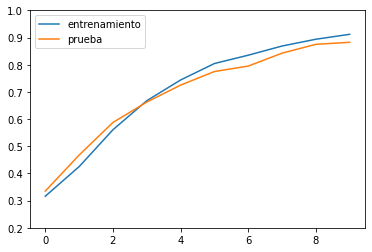

[0.3162499964237213, 0.42500001192092896, 0.5606250166893005, 0.6675000190734863, 0.7437499761581421, 0.8043749928474426, 0.8349999785423279, 0.8687499761581421, 0.893750011920929, 0.9118750095367432]


In [35]:
from matplotlib import pyplot
f, ax = pyplot.subplots()
ax.set_ylim(bottom=0.2)
ax.plot(history.history['accuracy'], label='entrenamiento')
ax.plot(history.history['val_accuracy'], label='prueba')
pyplot.legend()
pyplot.show(f)
print(history.history['accuracy'])